In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def get_trial_df(trial_name, minibatch_cols, epoch_cols):
    tr = pd.read_pickle("./output/{}/training_record.pkl".format(trial_name))
    num_minibatch = tr["Minibatch"].max()
    minibatch_df = (tr[tr["Minibatch"]!=-1])
    minibatch_df["Epoch"] = minibatch_df["Epoch"] + minibatch_df["Minibatch"]*(1/num_minibatch)
    minibatch_df = minibatch_df[["Epoch"]+minibatch_cols]

    epoch_df = (tr[tr["Minibatch"]==-1])
    epoch_df = epoch_df[["Epoch"]+epoch_cols]
    return minibatch_df, epoch_df

In [17]:
def plot_coral(minibatch_df):
    x = minibatch_df[['Epoch']]
    
    y1 = minibatch_df[['CoralLoss']]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(x, y1)
    ax1.set_ylabel('CoralLoss', color='b')
    ax1.set_xlabel("Epoch")
    #ax1.set_title("L2 Loss vs IoU, Lambda")
    for tl in ax1.get_yticklabels():
        tl.set_color('b')


    y2 = minibatch_df[['EDLoss']]
    ax2 = ax1.twinx()
    ax2.plot(x, y2, 'r-')
    ax2.set_ylabel('EDLoss', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Epoch,IoU
95,0.0,0.342671
191,1.0,0.359358


,Epoch,EDLoss,RLoss,CoralLoss
0,0.000000,18.457979,7.427947,0.008738
1,0.010638,13.392401,6.451591,0.010040
2,0.021277,11.658546,5.172692,0.011389
3,0.031915,10.475201,4.645678,0.012963
4,0.042553,9.516891,4.193193,0.012448
...,...,...,...,...
186,1.957447,2.730169,1.872182,0.011712
187,1.968085,2.981172,2.264684,0.007747
188,1.978723,3.102467,2.430362,0.008196
189,1.989362,2.941072,2.622808,0.009194


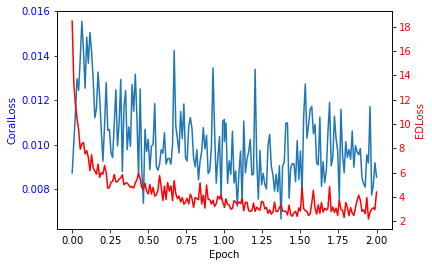

In [19]:
trial_name = "2020_03_19--04_00_31_CORAL_test_TRAIN"
minibatch_df, epoch_df = get_trial_df(trial_name, ["EDLoss", "RLoss", "CoralLoss"], ["IoU"])
display(epoch_df)
display(minibatch_df)
plot_coral(minibatch_df)